In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Pontos usados para os splines da questão 

x = np.array([2, 3, 4, 5, 6, 7])
y = np.array([0.5, 0.3333, 0.25, 0.2, 0.1667, 0.1429])

In [6]:
def spline_cubica(x, y):
    n = len(x) - 1
    matriz_spline_cubica = np.zeros([4*n, 4*n])
    B_spline_cubica = np.zeros((4*n))

    index_1 = 0

    for i in range(n):
    # Preenchimento do intervalo (x(i), x(i+1))
        matriz_spline_cubica[index_1, 4*i] = x[i]**3
        matriz_spline_cubica[index_1, 4*i + 1] = x[i]**2
        matriz_spline_cubica[index_1, 4*i + 2] = x[i]
        matriz_spline_cubica[index_1, 4*i + 3] = 1
        B_spline_cubica[index_1] = y[i]
        index_1 += 1

        matriz_spline_cubica[index_1, 4*i] = x[i+1]**3
        matriz_spline_cubica[index_1, 4*i + 1] = x[i+1]**2
        matriz_spline_cubica[index_1, 4*i + 2] = x[i+1]
        matriz_spline_cubica[index_1, 4*i + 3] = 1
        B_spline_cubica[index_1] = y[i+1]
        index_1 += 1

    for i in range(1, n):
    # Continuidade da primeira derivada
        matriz_spline_cubica[index_1, 4*(i-1)] = 3 * x[i]**2
        matriz_spline_cubica[index_1, 4*(i-1) + 1] = 2 * x[i]
        matriz_spline_cubica[index_1, 4*(i-1) + 2] = 1

        matriz_spline_cubica[index_1, 4*(i)] = - 3 * x[i]**2
        matriz_spline_cubica[index_1, 4*(i) + 1] = - 2 * x[i]
        matriz_spline_cubica[index_1, 4*(i) + 2] = -1      
 
        B_spline_cubica[index_1] = 0
        index_1 += 1

    for i in range(1, n):
    # Continuidade da segunda derivada
        matriz_spline_cubica[index_1, 4*(i-1)] = 6 * x[i]
        matriz_spline_cubica[index_1, 4*(i-1) + 1] = 2

        matriz_spline_cubica[index_1, 4*i] = -6 * x[i]
        matriz_spline_cubica[index_1, 4*i + 1] = -2
    
        B_spline_cubica[index_1] = 0
        index_1 += 1



    # Condições de fronteira

    matriz_spline_cubica[index_1, 0] = 6 * x[0]
    matriz_spline_cubica[index_1, 1] = 2
    B_spline_cubica[index_1] = 0
    index_1 += 1

    matriz_spline_cubica[index_1, 4*(n-1)]   = 6 * x[n]
    matriz_spline_cubica[index_1, 4*(n-1)+1] = 2
    B_spline_cubica[index_1] = 0
    index_1 += 1


    coeficientes_1 = np.linalg.solve(matriz_spline_cubica, B_spline_cubica)
    spline_coeficientes_1 = coeficientes_1.reshape(n, 4)

    plt.figure(figsize=(10,6))

    for i in range(n):
        a, b, c, d = spline_coeficientes_1[i]

        x_i = np.linspace(x[i], x[i+1], 100)

        y_i = a * x_i**3 + b * x_i**2 + c * x_i + d

        plt.plot(x_i, y_i)

    plt.scatter(x, y, color='red', s=100)
    plt.title('Gráfico da Spline cubica')
    plt.xlabel('Eixo x')
    plt.ylabel('F(x)')
    plt.legend()
    plt.show()

    return spline_coeficientes_1

C:\Users\vicen\AppData\Local\Temp\ipykernel_16092\1942088953.py:81: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


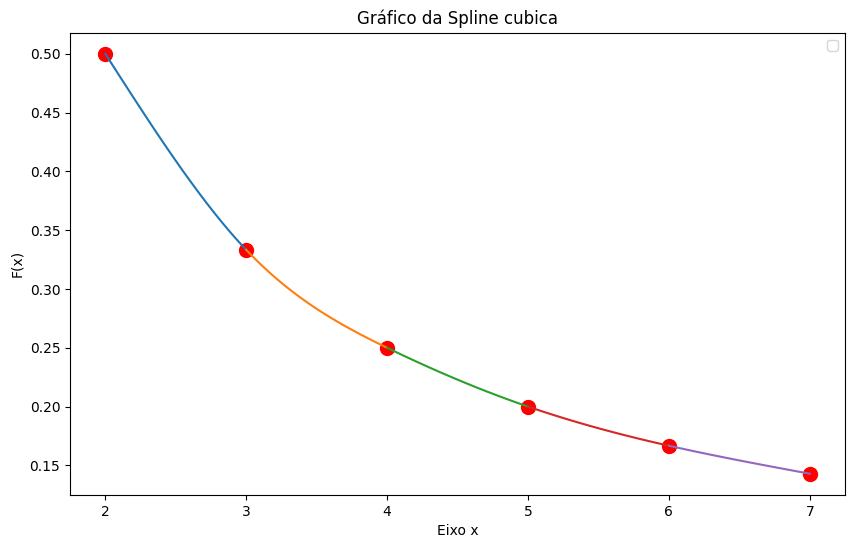

[[ 2.02306220e-02 -1.21383732e-01  5.58368421e-02  7.12016268e-01]
 [-1.77531100e-02  2.20469856e-01 -9.69723923e-01  1.73757703e+00]
 [ 6.81818182e-04 -7.49282297e-04 -8.48473684e-02  5.57741627e-01]
 [-1.57416268e-03  3.30904306e-02 -2.54045933e-01  8.39739234e-01]
 [-1.58516746e-03  3.32885167e-02 -2.55234450e-01  8.42116268e-01]]


In [ ]:
result = spline_cubica(x, y)

In [15]:
print(result[2])
# Printamos os coeficientes associados a terceira curva e então montamos a equação 

[ 0.00068182 -0.00074928 -0.08484737  0.55774163]


In [16]:
# Equação gerada pelos coeficientes 
def f_x(x):
    return ((x**3)*0.00068182 + (x**2)*-0.00074928 + (x)*-0.08484737 + 0.55774163 - 0.23)

In [17]:
def erro_relativo(x_ant, x_prox):
    return abs((x_prox-x_ant)/x_prox)

In [18]:
def bissecao(a, b, tol, max_iter):
    f_a = f_x(a)
    f_b = f_x(b)
    xr = (a + b)/2
    f_xr = f_x(xr)

    if f_xr * f_a < 0:
        b = xr
    else:
        a = xr  

    erro = 100
    iter = 1

    while erro > tol and iter <= max_iter:
        x_ant = xr
        f_a = f_x(a)
        f_b = f_x(b)
        xr = (a + b)/2
        f_xr = f_x(xr)
        erro = erro_relativo(x_ant, xr)

        print(f"Iteração {iter}: xr = {xr}, erro = {erro}")

        if f_xr * f_a < 0:
            b = xr
        else:
            a = xr

        iter += 1

    return xr, erro


In [14]:
# Estamos lidando com um valor de x entre 4 e 5. Então aplicamos o método da bissecção para estimar o valor de x
x_estimado = bissecao(4, 5, 0.00001, 10)

Iteração 1: xr = 4.25, erro = 0.058823529411764705
Iteração 2: xr = 4.375, erro = 0.02857142857142857
Iteração 3: xr = 4.3125, erro = 0.014492753623188406
Iteração 4: xr = 4.34375, erro = 0.007194244604316547
Iteração 5: xr = 4.359375, erro = 0.0035842293906810036
Iteração 6: xr = 4.3671875, erro = 0.0017889087656529517
Iteração 7: xr = 4.36328125, erro = 0.0008952551477170994
Iteração 8: xr = 4.361328125, erro = 0.0004478280340349306
Iteração 9: xr = 4.3623046875, erro = 0.00022386389075442132
Iteração 10: xr = 4.36181640625, erro = 0.00011194447554013209
